In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import matplotlib.pyplot as plt # 맷플롯립 import 하기
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

# umap 실습

In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,OneHotEncoder
import matplotlib.lines as mlines
from collections import Counter
import matplotlib.pyplot as plt

In [4]:
pip install umap

  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3543 sha256=f062e52962692453a12ca5b698cb1459fcfbc44c5b30bb40c1e1a2edae75821d
  Stored in directory: /root/.cache/pip/wheels/15/f1/28/53dcf7a309118ed35d810a5f9cb995217800f3f269ab5771cb
Successfully built umap


In [5]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86770 sha256=0cd2925ce3fe67b948710c833a617784b3b78f3e6a5356473423c66e4f215b86
  Stored in directory: /root/.cache/pip/wheels/fb/66/29/199acf5784d0f7b8add6d466175ab45506c96e386ed5dd0633
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=e0db201d7190ec82d71f4a4be8d68f595fb6c5562b59bc3a7c5ff9e752d39f87
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [6]:
import pandas as pd
import numpy as np
import umap
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,OneHotEncoder
import matplotlib.lines as mlines
from collections import Counter
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/통계학과경진대회/데이터/교내통계경진대회_데이터셋 - 2022년 퇴근 (하선,외선).csv', encoding='utf-8')

In [19]:
df.head()

,호선명,지하철역,총층수,퇴근_하외선_배차간격,승차인원_1718,승차인원_1819,승차인원_1920,하차인원_1718,하차인원_1819,하차인원_1920,...,공공 자전거 시설 수,퇴근시간 혼잡도,퇴근출발_HH,퇴근출발_HW,퇴근출발_WH,퇴근출발_WW,퇴근도착_HH,퇴근도착_HW,퇴근도착_WH,퇴근도착_WW
0,2,강남,3,4.591304,231421,306995,194665,133157,175540,102460,...,4,72.7,4255,6819,176616,25441,3743,9226,53178,14839
1,2,강변,2,4.684685,55399,60433,42352,75872,104712,74744,...,5,65.0,6113,6125,59279,5337,5317,7344,74491,5656
2,2,건대입구,5,4.732143,71707,82653,62600,104416,148210,99593,...,6,51.4,4969,13926,57530,8332,5727,14133,82202,11638
3,2,교대,3,4.600000,94092,133499,62492,59247,71156,40900,...,2,63.7,4485,7197,109678,11762,4079,6245,53051,12053
4,2,구로디지털단지,3,4.566964,125847,211812,99898,101032,155570,124825,...,6,70.6,6515,5802,243316,13081,4952,11557,65567,10264


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   호선명          280 non-null    int64  
 1   지하철역         280 non-null    object 
 2   총층수          280 non-null    int64  
 3   퇴근_하외선_배차간격  280 non-null    float64
 4   승차인원_1718    280 non-null    int64  
 5   승차인원_1819    280 non-null    int64  
 6   승차인원_1920    280 non-null    int64  
 7   하차인원_1718    280 non-null    int64  
 8   하차인원_1819    280 non-null    int64  
 9   하차인원_1920    280 non-null    int64  
 10  환승유입인원수      255 non-null    float64
 11  총사고발생수       280 non-null    int64  
 12  반경 내 학교 수    280 non-null    int64  
 13  반경 내 주요공원 수  280 non-null    int64  
 14  반경 아파트 수     280 non-null    int64  
 15  반경 내 대학교 수   280 non-null    int64  
 16  공공 자전거 시설 수  280 non-null    int64  
 17  퇴근시간 혼잡도     280 non-null    float64
 18  퇴근출발_HH      280 non-null    int64  
 19  퇴근출발_HW 

In [21]:
import seaborn as sns

#데이터 전처리

In [22]:
selected_columns = ['안전시설지수(승강장연결,스크린도어,안전발판)',
                         '열차내 사고',
                         '역구내 사고',
                         '출입문관련',
                         '승강설비관련',
                         '발빠짐',
                         '기타',
                         '반경 내 대학교 수',
                         '반경 내 대학 수']
df = df.drop(columns=['반경 내 대학교 수','지하철역','호선명']);df

# '승차인원' 변수 생성
df['승차인원'] = df['승차인원_1718'] + df['승차인원_1819'] + df['승차인원_1920']

# '하차인원' 변수 생성
df['하차인원'] = df['하차인원_1718'] + df['하차인원_1819'] + df['하차인원_1920']

# 필요한 변수들 제거
variables_to_drop = ['승차인원_1718', '승차인원_1819', '승차인원_1920', '하차인원_1718', '하차인원_1819', '하차인원_1920']
df.drop(columns=variables_to_drop, inplace=True)

##이상치 확인

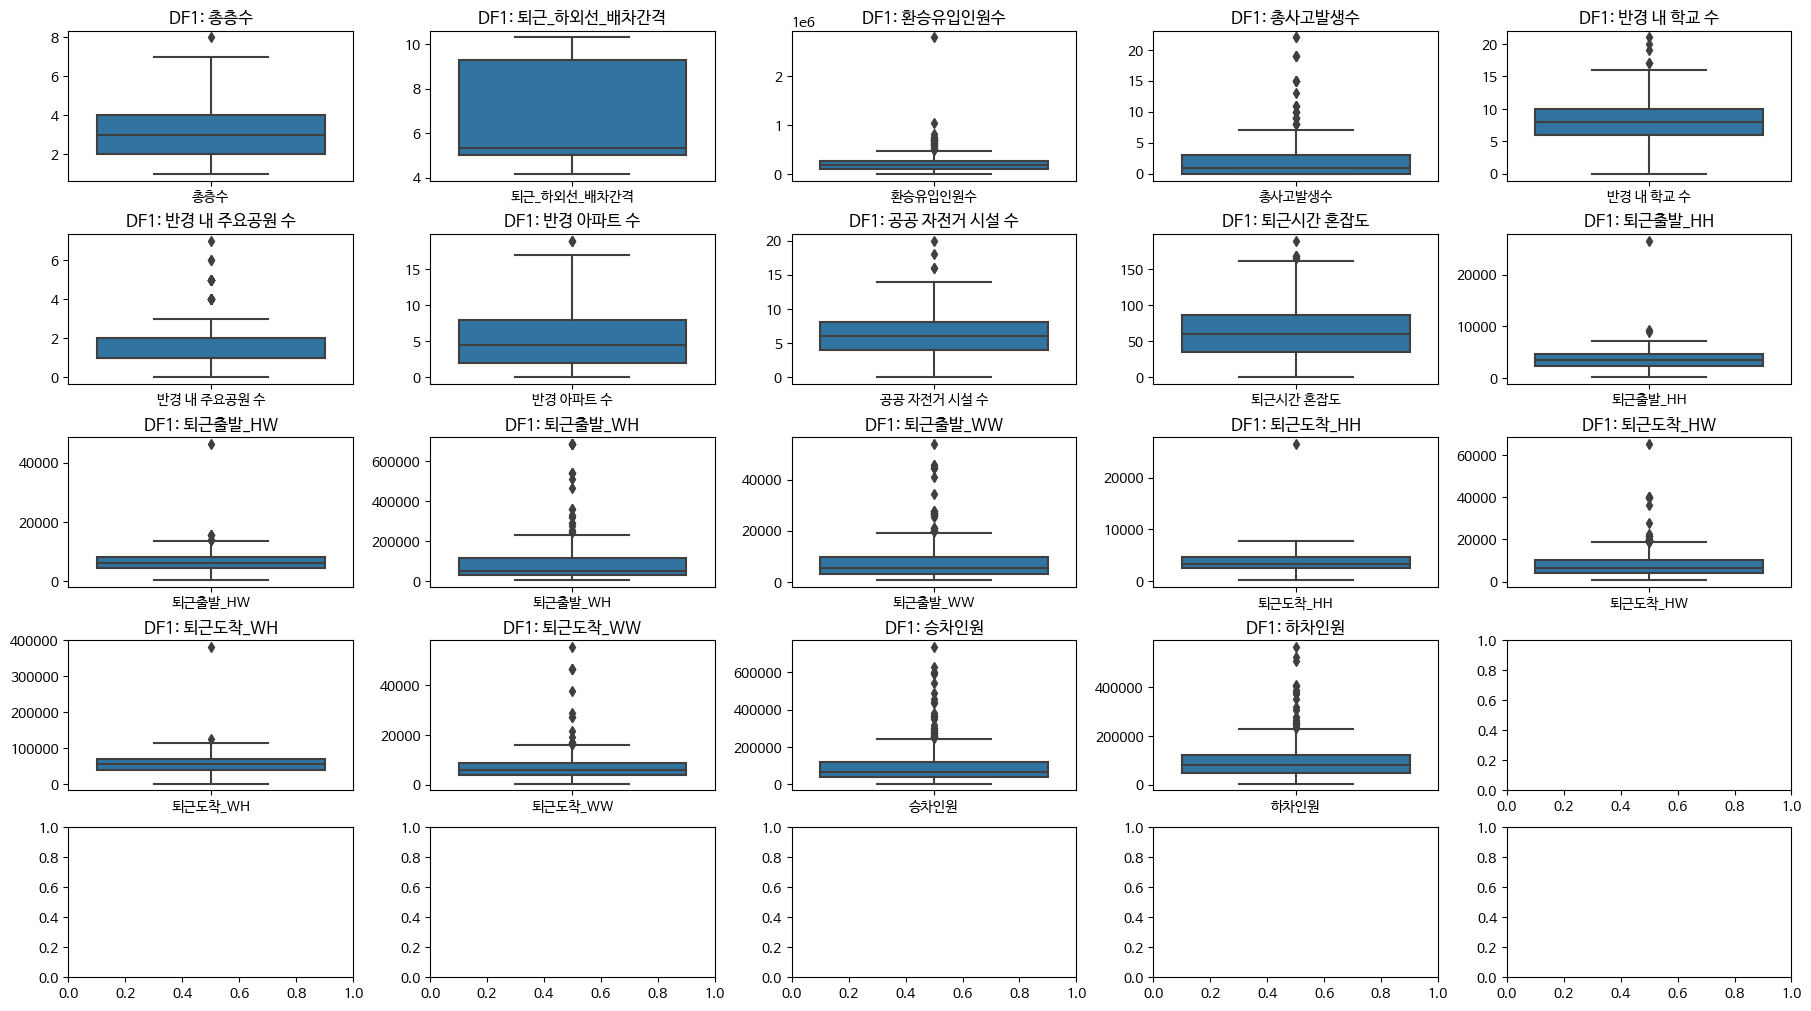

In [23]:
# 그래프를 그릴 캔버스 생성
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(18, 10), constrained_layout=True)
axes = axes.flatten()

# 각 변수에 대한 Boxplot 그리기 (첫 번째 데이터프레임)
for i, variable in enumerate(df.columns):
    sns.boxplot(x='variable', y='value', data=pd.melt(df[[variable]]), ax=axes[i])
    axes[i].set_title(f'DF1: {variable}')
    axes[i].set_xlabel(None)
    axes[i].set_ylabel(None)

# 그래프 보여주기
plt.show()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   총층수          280 non-null    int64  
 1   퇴근_하외선_배차간격  280 non-null    float64
 2   환승유입인원수      255 non-null    float64
 3   총사고발생수       280 non-null    int64  
 4   반경 내 학교 수    280 non-null    int64  
 5   반경 내 주요공원 수  280 non-null    int64  
 6   반경 아파트 수     280 non-null    int64  
 7   공공 자전거 시설 수  280 non-null    int64  
 8   퇴근시간 혼잡도     280 non-null    float64
 9   퇴근출발_HH      280 non-null    int64  
 10  퇴근출발_HW      280 non-null    int64  
 11  퇴근출발_WH      280 non-null    int64  
 12  퇴근출발_WW      280 non-null    int64  
 13  퇴근도착_HH      280 non-null    int64  
 14  퇴근도착_HW      280 non-null    int64  
 15  퇴근도착_WH      280 non-null    int64  
 16  퇴근도착_WW      280 non-null    int64  
 17  승차인원         280 non-null    int64  
 18  하차인원         280 non-null    int64  
dtypes: float

##이상치 많은 데이터 및 왜도를 위해 로그변환

In [27]:
selected_columns = df.drop(columns=['퇴근시간 혼잡도','퇴근_하외선_배차간격'],axis=1).columns.to_list()
scaled_df = df.copy()
scaled_df[selected_columns] = np.log1p(scaled_df[selected_columns])

In [28]:
scaled_df.head()

,총층수,퇴근_하외선_배차간격,환승유입인원수,총사고발생수,반경 내 학교 수,반경 내 주요공원 수,반경 아파트 수,공공 자전거 시설 수,퇴근시간 혼잡도,퇴근출발_HH,퇴근출발_HW,퇴근출발_WH,퇴근출발_WW,퇴근도착_HH,퇴근도착_HW,퇴근도착_WH,퇴근도착_WW,승차인원,하차인원
0,1.386294,4.591304,13.631272,2.197225,1.791759,0.000000,1.945910,1.609438,72.7,8.356085,8.827615,12.081739,10.144157,8.227910,9.129889,10.881419,9.605082,13.505013,12.926733
1,1.098612,4.684685,12.662012,1.609438,2.302585,0.000000,2.079442,1.791759,65.0,8.718337,8.720297,10.990027,8.582606,8.578853,8.901775,11.218447,8.640649,11.971521,12.450308
2,1.791759,4.732143,12.832871,1.945910,2.484907,0.693147,1.098612,1.945910,51.4,8.511175,9.541585,10.960079,9.027979,8.653122,9.556339,11.316947,9.362117,12.287473,12.772011
3,1.386294,4.600000,12.813980,2.772589,1.945910,0.000000,1.609438,1.098612,63.7,8.408717,8.881558,11.605313,9.372714,8.313852,8.739697,10.879028,9.397152,12.577926,12.051195
4,1.386294,4.566964,13.502511,2.639057,2.397895,0.693147,2.197225,1.945910,70.6,8.782016,8.666130,12.402120,9.478993,8.507749,9.355133,11.090843,9.236495,12.988965,12.851677


In [29]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
# 스케일링할 변수들 선택
selected_columns = scaled_df.columns.to_list()

# RobustScaler 객체를 생성합니다.
ss = StandardScaler()

# 선택한 변수들에 대해 스케일링 수행
scaled_df[selected_columns] = ss.fit_transform(scaled_df[selected_columns])

In [30]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   총층수          280 non-null    float64
 1   퇴근_하외선_배차간격  280 non-null    float64
 2   환승유입인원수      255 non-null    float64
 3   총사고발생수       280 non-null    float64
 4   반경 내 학교 수    280 non-null    float64
 5   반경 내 주요공원 수  280 non-null    float64
 6   반경 아파트 수     280 non-null    float64
 7   공공 자전거 시설 수  280 non-null    float64
 8   퇴근시간 혼잡도     280 non-null    float64
 9   퇴근출발_HH      280 non-null    float64
 10  퇴근출발_HW      280 non-null    float64
 11  퇴근출발_WH      280 non-null    float64
 12  퇴근출발_WW      280 non-null    float64
 13  퇴근도착_HH      280 non-null    float64
 14  퇴근도착_HW      280 non-null    float64
 15  퇴근도착_WH      280 non-null    float64
 16  퇴근도착_WW      280 non-null    float64
 17  승차인원         280 non-null    float64
 18  하차인원         280 non-null    float64
dtypes: float

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


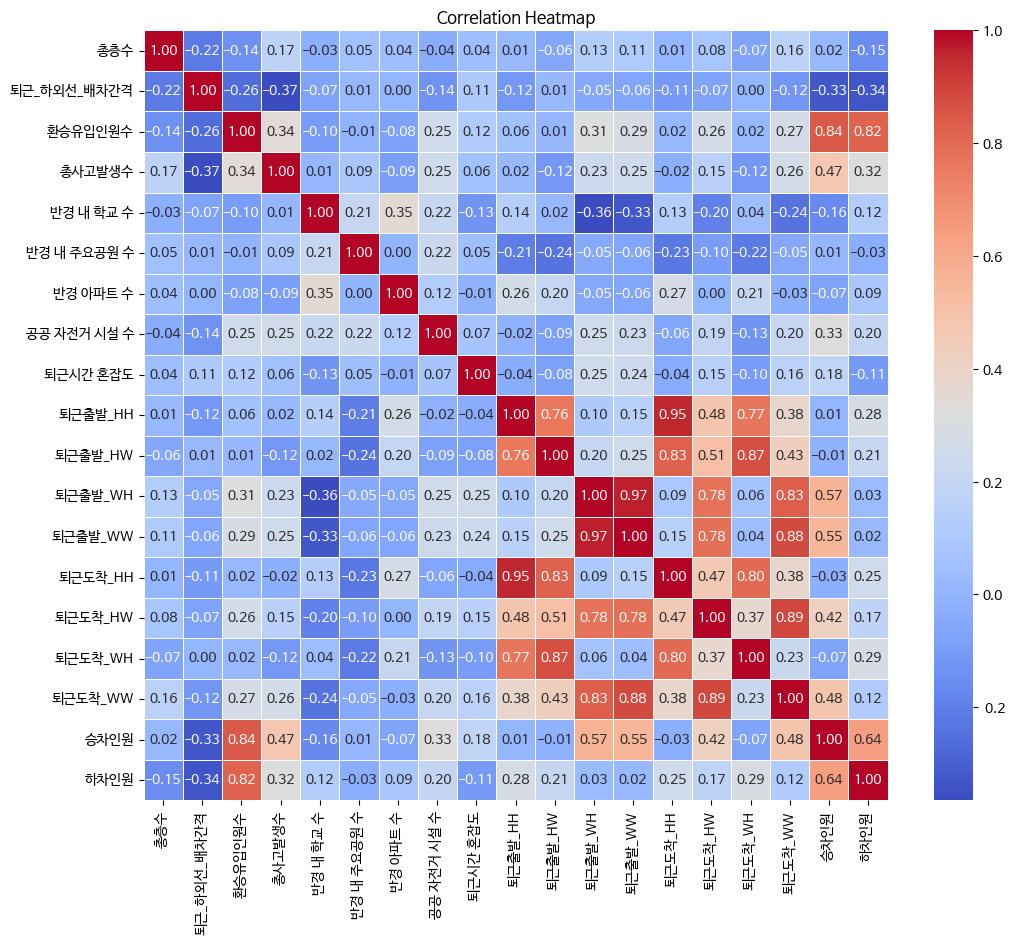

In [31]:
# 히트맵 데이터 추출
heatmap_data = scaled_df[selected_columns]

# 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

#umap

In [32]:
import umap

scaled_df.rename(columns  = {'퇴근시간 혼잡도': 'target'}, inplace = True)
scaled_df.drop('환승유입인원수',axis=1, inplace= True)

embedding_2d = umap.UMAP(n_neighbors =15, min_dist=0.25,random_state = 42 ,n_components=2).fit_transform(scaled_df.drop(['target'],axis=1).to_numpy())
embedding_3d = umap.UMAP(n_neighbors =15, min_dist=0.25,random_state = 42 ,n_components=3).fit_transform(scaled_df.drop(['target'],axis=1).to_numpy())



/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


<Axes: >

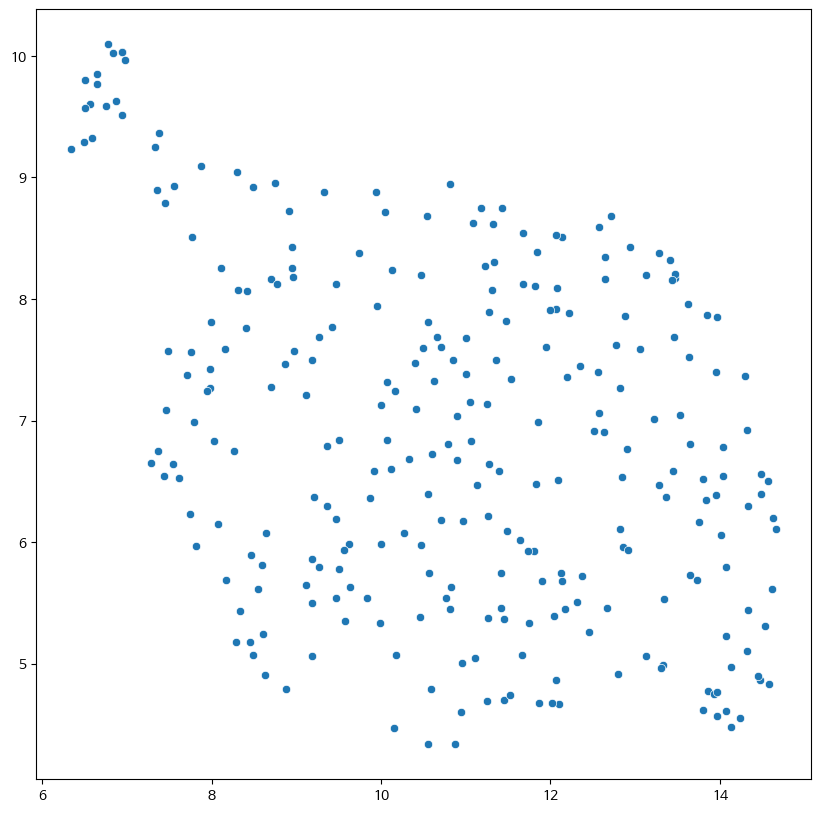

In [33]:
embedding_2d = umap.UMAP(n_neighbors =15, min_dist=0.25,random_state = 42 ,n_components=2).fit_transform(scaled_df.drop(['target'],axis=1).to_numpy())
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.scatterplot(x = embedding_2d[:, 0], y = embedding_2d[:, 1], data=df)

In [35]:
import plotly.express as px

plt.figure(figsize=(50,30))
umap_3d = px.scatter_3d(
    embedding_3d, x=0, y=1, z=2,
    labels={'color': 'target'},
    color= df['퇴근시간 혼잡도'],
    color_discrete_sequence=['red', 'seagreen', 'gold', 'black'],
)

umap_3d.update_traces(marker_size=2)
umap_3d.show()

<Figure size 5000x3000 with 0 Axes>

In [36]:
data_umap = pd.DataFrame(umap.UMAP(n_neighbors =15, min_dist=0.25,random_state = 42 ,n_components=3).fit_transform(scaled_df.drop(['target'],axis=1)),
                        columns = (["UM1","UM2","UM3"]))

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



# DBSCAN

In [37]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
dbscan = DBSCAN()
clusters = dbscan.fit_predict(data_umap)
print('클러스터 레이블:\n', clusters)

클러스터 레이블:
 [ 0  0 -1  0  0 13 -1  4 -1 -1  1 -1 -1  7  0 -1  0 -1 -1  0  0  0  1  3
 14 -1  0  0  2  0 -1  3  0  4  4  5 -1  1  1  1  6  0  0  7  4 10 -1  0
 -1 -1  3  0  0  3  8  0  5  8 -1 -1  8  7  2  3 -1  8  0  7  0  8  0  9
  8  1 -1  5 12 -1  3  6  5  4  0  1  1  5  1 10  0 -1  0 13  1  0  0 10
  0 -1  0 -1 -1  1 14  0  1  4  3  8  8  3  0 14  1  9  2  6 -1 -1 10  1
 11 10  6  4  2  6  0  3  8  2  4 10  8  8 -1  9  4  5 12 12  4  0  6  6
  7  4  6  1 10  1  0  8  4  8  0  6  6  6  6  7  6  8 -1  8 -1 -1 -1  8
  3  8  6  0 11  5  7 13 -1 -1  8  6 -1 -1  9 -1  7  7  8  6 10 10  2  7
  0 12  4  0 -1 -1  0  8 10  4  0  4 -1  6 13 -1 14  6  0 -1 14 -1 13 14
 14 -1 10  7  8  0 -1  6 -1  9 -1 12 -1 -1  0  6  6 11  0 -1 11 -1  8  0
 -1  0  2  5 -1  5  7 -1 -1  5 -1  6  5  7  8 -1 12  5 -1 11 12 11 11  3
 -1 11  0  5  5  5 -1  0 12  3  7  7  5  3  7  3]


In [38]:
!pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 6.9 MB/s eta 0:00:00


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


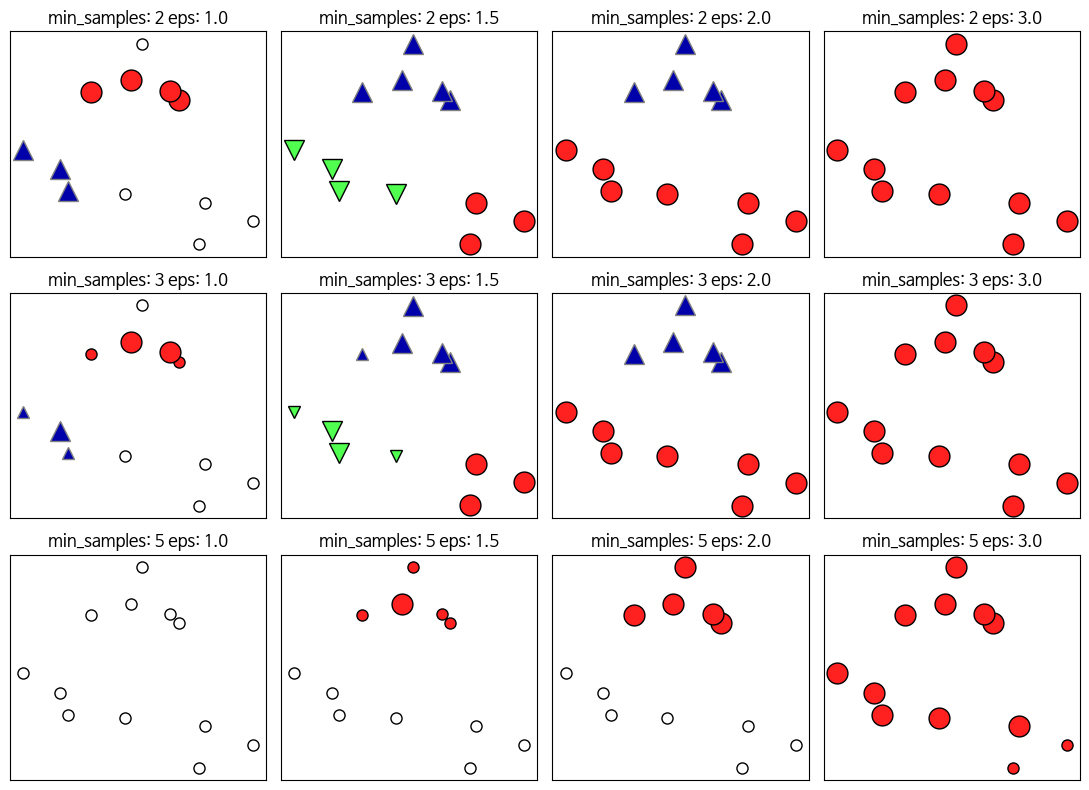

In [39]:
import mglearn
mglearn.plots.plot_dbscan()

In [40]:
data_umap.iloc[:,1]

0      2.659465
1      3.354017
2      3.438324
3      2.904820
4      2.681436
         ...   
275    8.338923
276    6.456163
277    6.125579
278    8.075320
279    6.917790
Name: UM2, Length: 280, dtype: float32

In [41]:
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering

epsilon = 0.55
minimunSamples = 4
cluster_labels =  DBSCAN(eps = epsilon, min_samples = minimunSamples).fit_predict(data_umap)
cluster_labels

array([ 0,  0,  0,  0,  0,  1,  1,  0, -1,  0,  2,  3, -1,  4,  0,  3,  0,
        4,  0,  0,  0,  0,  2,  4,  0, -1,  0,  0,  0,  0, -1,  4,  0,  0,
        0,  4,  4,  2,  2,  2,  0,  0,  0,  4,  0,  3,  3,  0,  0,  5,  4,
        0,  0,  4,  4,  0,  4,  4,  0,  0,  4,  4,  0,  4, -1,  4,  0,  4,
        0,  4,  0,  3,  4,  2, -1,  4,  5,  6,  4,  0,  4,  0,  0,  2,  2,
        4,  2,  3,  0,  3,  0,  1,  2,  0,  0,  3,  0, -1,  0, -1,  0,  2,
        0,  0,  2,  0,  4,  4,  4,  4,  0,  0,  2,  3,  0,  0,  4, -1,  3,
        2,  4,  3,  0,  0,  0,  0,  0,  4,  4,  0,  0,  3,  4,  4,  0,  3,
        0,  4,  5,  5,  0,  0,  0,  0,  4,  0,  0,  2,  3,  2,  0,  4,  0,
        4,  0,  0,  0,  0,  0,  4,  0,  4,  4,  4,  3,  3,  3,  4,  4,  4,
        0,  0,  4,  4,  4,  1, -1, -1,  4,  0,  3,  4,  3, -1,  4,  4,  4,
        0,  3,  3,  0,  4,  0,  0,  0,  0,  0,  3,  0,  4,  3,  0,  0,  0,
        4,  0,  1,  0,  0,  0,  0,  0,  0,  4,  1,  0,  0,  0,  3,  4,  4,
        0,  0,  0,  4,  3

In [42]:
scaled_df['Cluster'] = cluster_labels

# 3D 산점도 시각화
fig = px.scatter_3d(data_umap, x=data_umap.iloc[:,0], y=data_umap.iloc[:,1], z=data_umap.iloc[:,2],
    labels={'color': 'Cluster'},
    color= scaled_df['Cluster'],
    color_discrete_sequence=['red', 'seagreen', 'gold', 'black'],
)
fig.update_layout(scene=dict(xaxis_title='Feature 1', yaxis_title='Feature 2', zaxis_title='Feature 3'))
fig.show()

In [ ]:
# from sklearn.cluster import DBSCAN
# from sklearn.metrics import silhouette_score
# from sklearn.model_selection import ParameterGrid
# best_score = -1
# best_eps = None
# best_min_samples = None

# for eps in [0.5, 0.7,1.0, 1.5,2.0]:
#     for min_samples in [2,3,5, 7, 10]:
#         dbscan = DBSCAN(eps=eps, min_samples=min_samples)
#         cluster_labels = dbscan.fit_predict(data_umap)
#         score = silhouette_score(data_umap, cluster_labels)
#         if score > best_score:
#             best_score = score
#             best_eps = eps
#             best_min_samples = min_samples

# print(f"Best Parameters: eps={best_eps}, min_samples={best_min_samples}")

ValueError: ignored

# k-means 클러스터링

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

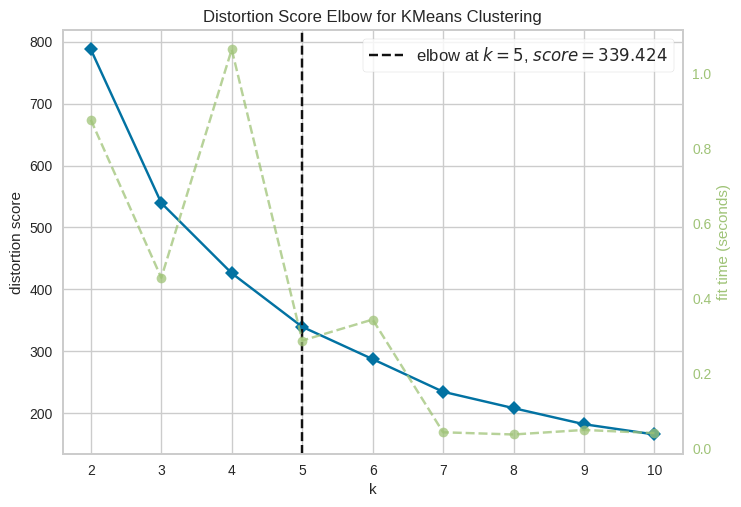

In [43]:
from yellowbrick.cluster import KElbowVisualizer
km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(data_umap)
Elbow_M.show()

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

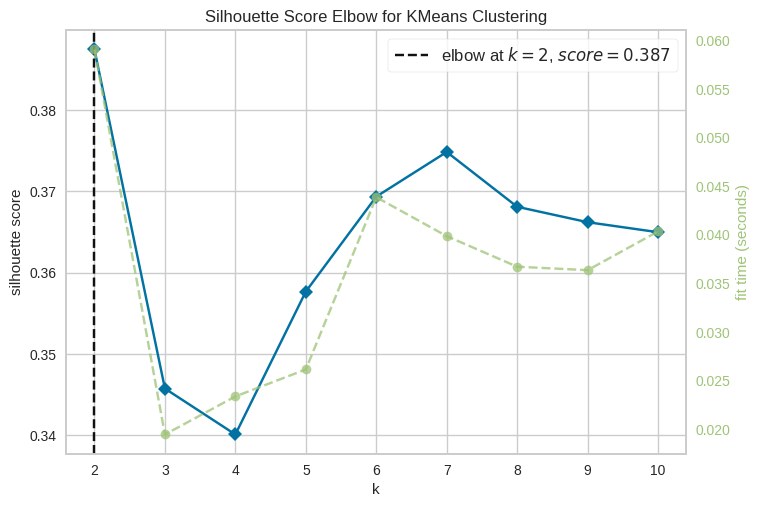

In [44]:
km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10, metric='silhouette')
Elbow_M.fit(data_umap)
Elbow_M.show()

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

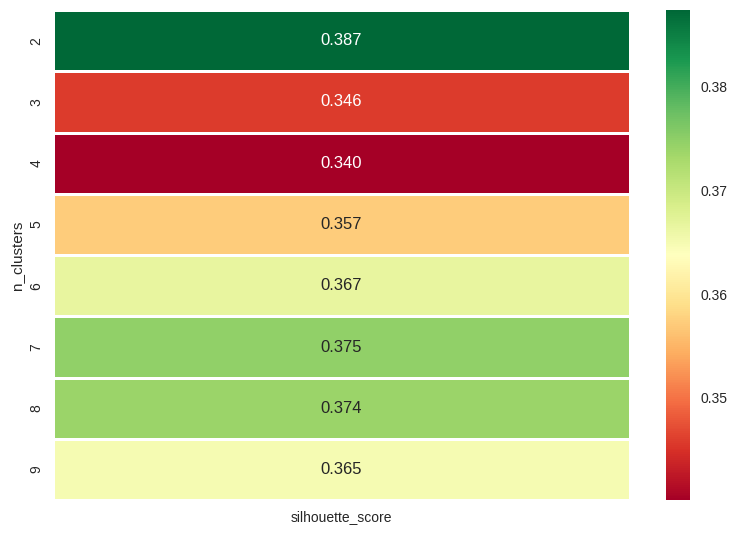

In [45]:
def visualize_silhouette_layer(data):
    clusters_range = range(2,10)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=42)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='RdYlGn')
    plt.tight_layout()
    plt.show()
visualize_silhouette_layer(data_umap)

In [46]:
# k=5으로 클러스터링 수행

km = KMeans(n_clusters=6, random_state=42)

yhat_AC = km.fit_predict(data_umap)

data_umap["Clusters"] = yhat_AC   # for evaluating the model
df["Clusters"]= yhat_AC        # for customers profiling

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [47]:
scaled_df['Cluster'] = yhat_AC

# 3D 산점도 시각화
fig = px.scatter_3d(data_umap, x=data_umap.iloc[:,0], y=data_umap.iloc[:,1], z=data_umap.iloc[:,2],
    labels={'color': 'Cluster'},
    color= scaled_df['Cluster'],
    color_discrete_sequence=['red', 'seagreen', 'gold', 'black'],
)
fig.update_layout(scene=dict(xaxis_title='Feature 1', yaxis_title='Feature 2', zaxis_title='Feature 3'))
fig.show()

# pca로 해보기

In [48]:
data_scaled = scaled_df.drop(columns = ['target','Cluster'],axis=1)

In [49]:
scaled_df.head()

,총층수,퇴근_하외선_배차간격,총사고발생수,반경 내 학교 수,반경 내 주요공원 수,반경 아파트 수,공공 자전거 시설 수,target,퇴근출발_HH,퇴근출발_HW,퇴근출발_WH,퇴근출발_WW,퇴근도착_HH,퇴근도착_HW,퇴근도착_WH,퇴근도착_WW,승차인원,하차인원,Cluster
0,0.019357,-1.000750,1.602540,-0.712675,-1.756422,0.503692,-0.508201,0.245122,0.514339,0.347134,1.202080,1.787540,0.358042,0.496502,0.151073,1.304113,2.528785,2.128416,5
1,-1.064654,-0.957103,0.918877,0.377358,-1.756422,0.673409,-0.127278,0.030457,1.108649,0.140043,0.052610,-0.096890,0.961198,0.182582,0.680763,-0.052411,0.877542,1.529735,5
2,1.547185,-0.934921,1.310233,0.766408,-0.341396,-0.573214,0.194787,-0.348691,0.768780,1.724886,0.021078,0.440572,1.088842,1.083362,0.835571,0.962370,1.217755,1.933991,0
3,0.019357,-0.996686,2.271755,-0.383738,-1.756422,0.076040,-1.575462,-0.005785,0.600686,0.451230,0.700448,0.856588,0.505749,-0.040463,0.147315,1.011649,1.530511,1.028204,5
4,0.019357,-1.012127,2.116443,0.580737,-0.341396,0.823110,0.194787,0.186577,1.213121,0.035516,1.539411,0.984841,0.838994,0.806473,0.480215,0.785677,1.973112,2.034100,5


In [50]:

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D

variance_ratio = {}

for i in range(1, len(data_scaled.columns)+1):
    pca = PCA(n_components=i)
    pca.fit(data_scaled)
    variance_ratio[f'n_{i}'] = pca.explained_variance_ratio_.sum()

In [51]:
variance_ratio

{'n_1': 0.29649930484991704,
 'n_2': 0.4926517792558277,
 'n_3': 0.6148107206476747,
 'n_4': 0.6957639538344228,
 'n_5': 0.7671731770043974,
 'n_6': 0.8173008547068261,
 'n_7': 0.8565022474692863,
 'n_8': 0.8910037236481461,
 'n_9': 0.9222725743324862,
 'n_10': 0.9509760884320916,
 'n_11': 0.9686494278185023,
 'n_12': 0.9796256845224853,
 'n_13': 0.9877741902247582,
 'n_14': 0.9934298161026607,
 'n_15': 0.9970023433962616,
 'n_16': 0.9991886219092359,
 'n_17': 1.0}

In [52]:
# eigenvector per each PC
data_pca7 = pd.DataFrame(pca.components_[0:7],
                         columns=data_scaled.columns,
                         index = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7']).T

data_pca7

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
총층수,-0.038541,0.088962,0.002902,-0.121980,0.789308,0.033954,-0.217923
퇴근_하외선_배차간격,0.090583,-0.089003,0.382570,-0.253788,-0.395847,-0.038360,-0.202648
총사고발생수,-0.114774,0.235162,-0.341729,0.155406,0.200965,-0.141779,0.186769
반경 내 학교 수,0.072248,-0.183117,-0.391440,-0.403414,0.005579,0.022592,0.237790
반경 내 주요공원 수,0.085979,0.125331,-0.179098,-0.436305,-0.026675,-0.702598,-0.428750
반경 아파트 수,-0.051844,-0.194433,-0.198354,-0.423904,0.026488,0.627578,-0.407769
공공 자전거 시설 수,-0.085312,0.185382,-0.310312,-0.381556,-0.230499,0.049127,0.486856
퇴근출발_HH,-0.305134,-0.337586,-0.080519,-0.003645,0.083860,-0.103502,0.110192
퇴근출발_HW,-0.313683,-0.326862,0.071889,0.010179,-0.040170,-0.099906,-0.013228
퇴근출발_WH,-0.325187,0.300478,0.187932,-0.125508,-0.040928,0.100108,-0.047003


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning:

Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning:

Glyph 52789 (\N{HANGUL SYLLABLE CEUNG}) missing from current font.

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning:

Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning:

Glyph 53748 (\N{HANGUL SYLLABLE TOE}) missing from current font.

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning:

Glyph 44540 (\N{HANGUL SYLLABLE GEUN}) missing from current font.

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning:

Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning:

Glyph 50808 (\N{HANGUL SYLLABLE OE}) missing from current font.

/usr/local/l

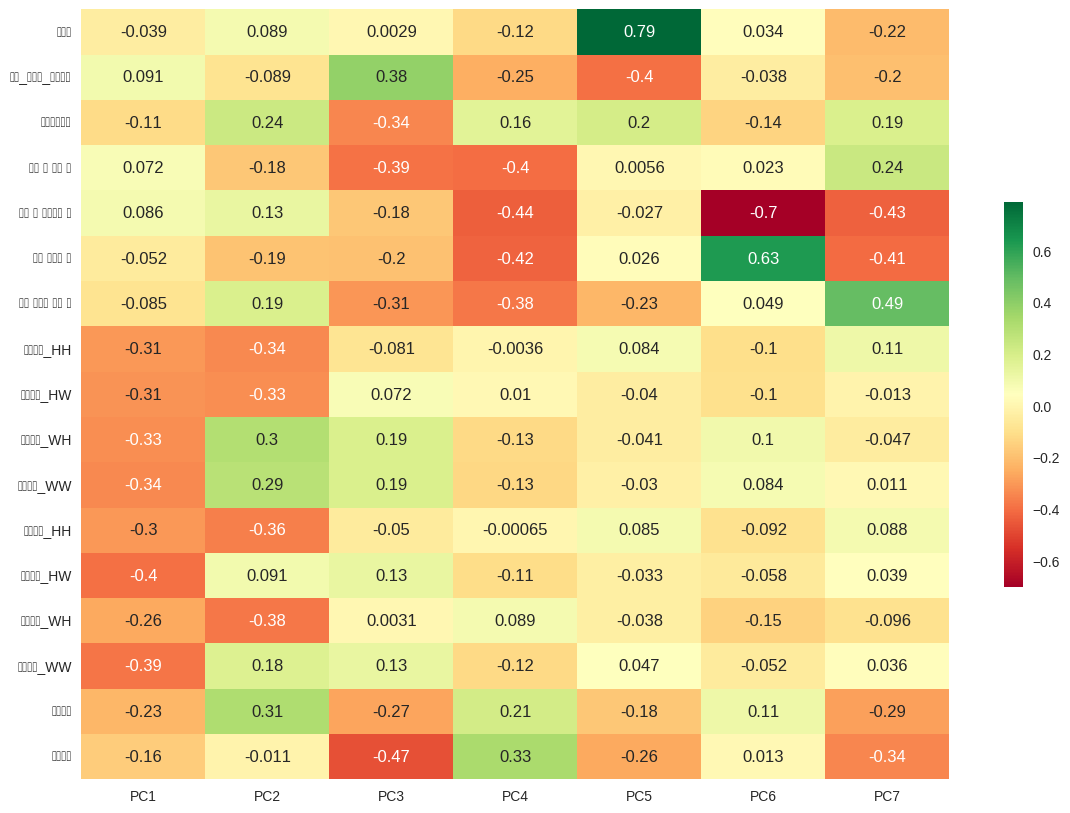

In [53]:
# heatmap for each loading(value of the elements of eigenvector against each principal component.)

plt.figure(figsize=(14, 10))
sns.heatmap(data_pca7,
            annot=True,
            cmap='RdYlGn',
            cbar_kws={'shrink' : 0.5}
           )

plt.show()

<ipython-input-54-a15f0c585218>:8: MatplotlibDeprecationWarning:

Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.



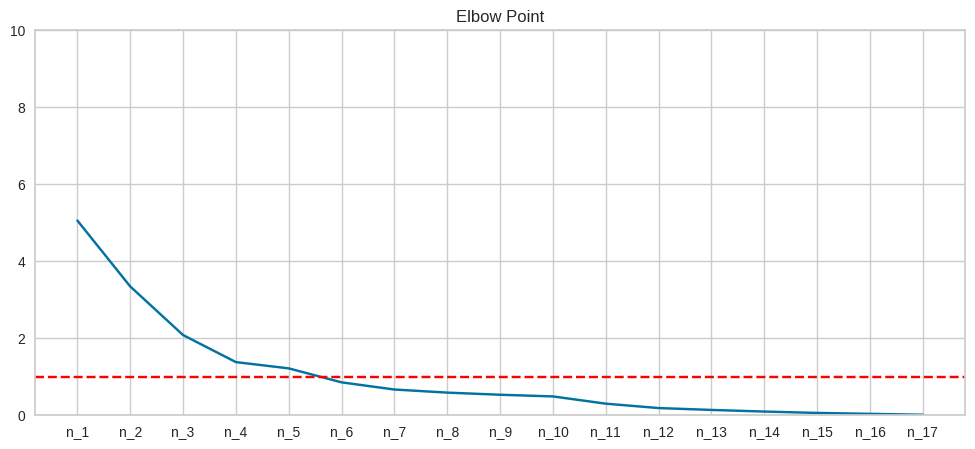

In [54]:
# eigen value
import numpy as np
eigen_value = np.sort(pca.explained_variance_)[::-1]

plt.figure(figsize=(12, 5))

plt.plot(variance_ratio.keys(), eigen_value)
plt.ylim(0, 10, 1)
plt.axhline(1, color = 'red', ls = '--')
plt.title('Elbow Point')

plt.show()

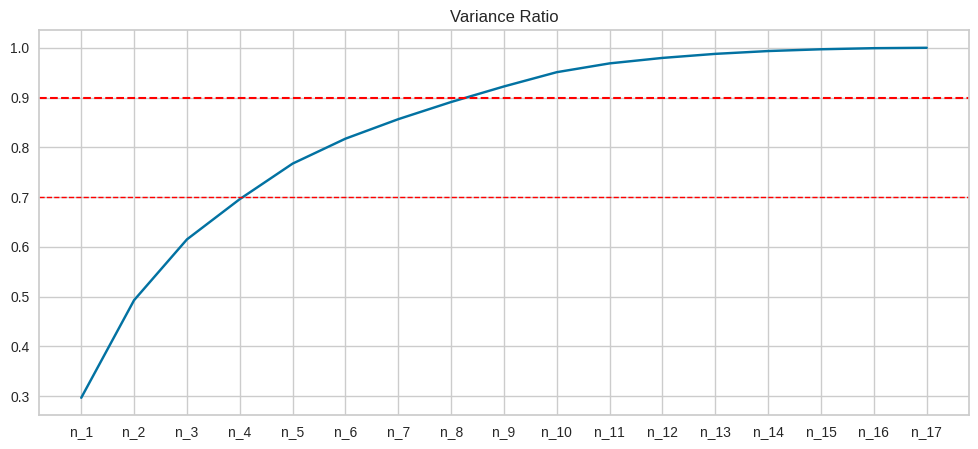

In [55]:
plt.figure(figsize = (12, 5))

plt.plot(variance_ratio.keys(), variance_ratio.values())
plt.axhline(0.7, color = 'red', ls = '--', lw = 1)
plt.axhline(0.9, color = 'red', ls = '--', lw = 1.5)
plt.title("Variance Ratio")

plt.show()

In [56]:
pca = PCA(n_components = 7, random_state = 42)

pca.fit(data_scaled)
data_pca = pd.DataFrame(pca.transform(data_scaled),
                        columns = (["PC1", "PC2", "PC3", "PC4", "PC5","PC6","PC7"]))

## k-means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

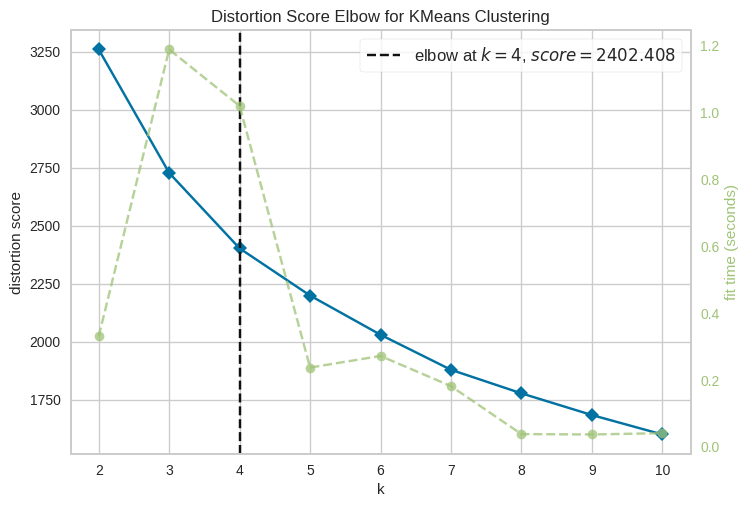

In [57]:
from yellowbrick.cluster import KElbowVisualizer
km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(data_pca)
Elbow_M.show()

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

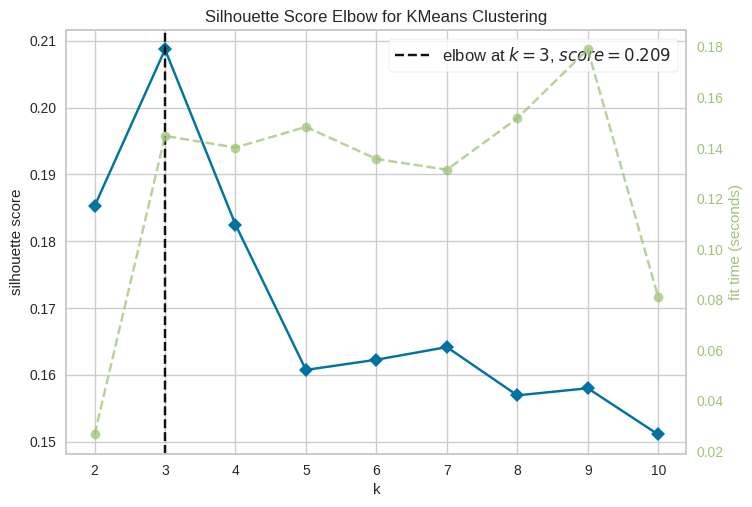

In [58]:
km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10, metric='silhouette')
Elbow_M.fit(data_pca)
Elbow_M.show()

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

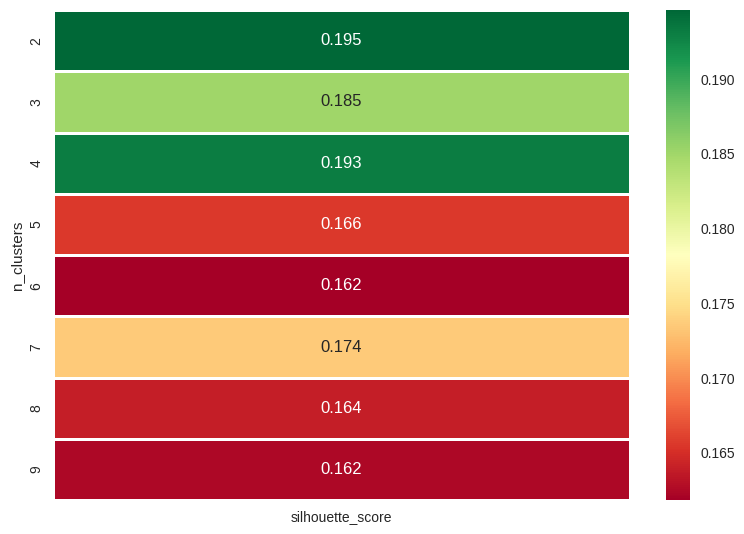

In [ ]:
def visualize_silhouette_layer(data):
    clusters_range = range(2,10)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=42)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='RdYlGn')
    plt.tight_layout()
    plt.show()
visualize_silhouette_layer(data_pca)

In [59]:
# k=2으로 클러스터링 수행

km = KMeans(n_clusters=4, random_state=42)

yhat_AC = km.fit_predict(data_pca)

data_pca["Clusters"] = yhat_AC   # for evaluating the model
df["Clusters"]= yhat_AC        # for customers profiling

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [60]:
# 3D 산점도 시각화
fig = px.scatter_3d(data_pca, x=data_pca.iloc[:,0], y=data_pca.iloc[:,1], z=data_pca.iloc[:,2],
    labels={'color': 'Cluster'},
    color= df['Clusters'],
    color_discrete_sequence=['red', 'seagreen', 'gold', 'black'],
)
fig.update_layout(scene=dict(xaxis_title='Feature 1', yaxis_title='Feature 2', zaxis_title='Feature 3'))
fig.show()

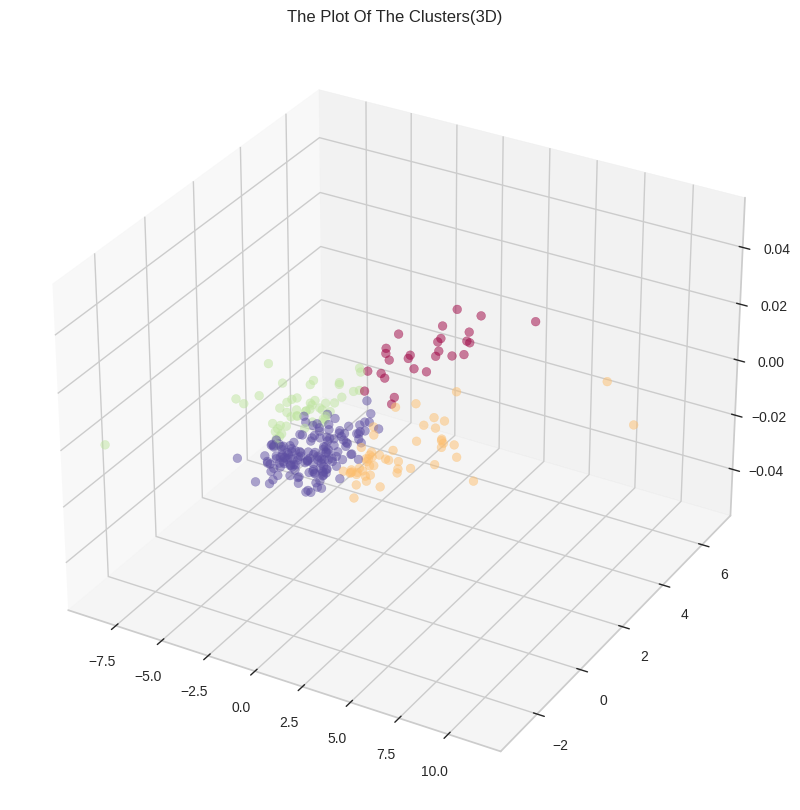

In [61]:
# 3 dimension

x =data_pca["PC1"]
y =data_pca["PC2"]
z =data_pca["PC3"]

fig = plt.figure(figsize=(12,10))
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, s=40, c=data_pca["Clusters"], marker='o', alpha = 0.5, cmap = 'Spectral')
ax.set_title("The Plot Of The Clusters(3D)")

plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.



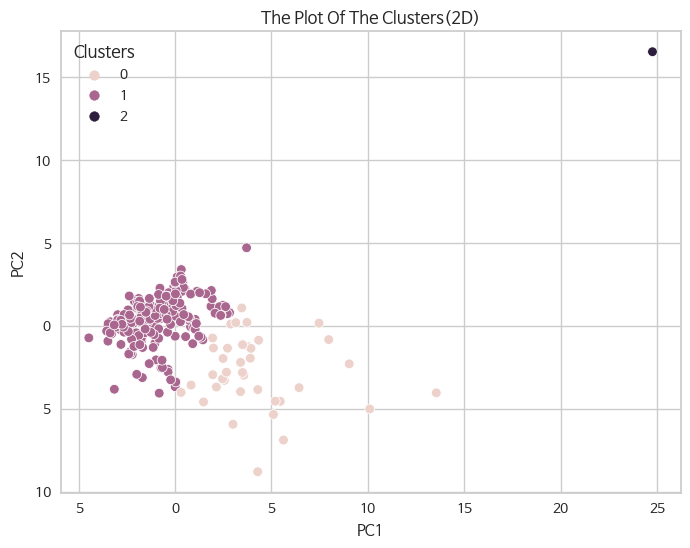

In [ ]:
# 2 dimension

plt.figure(figsize=(8,6))

sns.scatterplot(data = data_pca, x = 'PC1', y='PC2', hue='Clusters')
plt.title('The Plot Of The Clusters(2D)')
plt.show()

In [ ]:
df[df["Clusters"]==2]

,총층수,출근_상내선_배차간격,환승유입인원수,총사고발생수,반경 내 학교 수,반경 내 주요공원 수,반경 아파트 수,공공 자전거 시설 수,"출근시간 혼잡도 평균(상선,내선)",출근출발_HE,...,출근출발_WW,출근도착_HE,출근도착_HH,출근도착_HW,출근도착_WE,출근도착_WH,출근도착_WW,승차인원,하차인원,Clusters
84,3,9.3333,112957,1,2,0,7,3,2.428571,189992,...,21213,194663,11844,823178,18623,14218,22438,100614,27536,2


차원 축소 umap에 k-means 클러스터링으로 결정

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   총층수                 277 non-null    int64  
 1   출근_상내선_배차간격         277 non-null    float64
 2   환승유입인원수             252 non-null    float64
 3   총사고발생수              277 non-null    int64  
 4   반경 내 학교 수           277 non-null    int64  
 5   반경 내 주요공원 수         277 non-null    int64  
 6   반경 아파트 수            277 non-null    int64  
 7   공공 자전거 시설 수         277 non-null    int64  
 8   출근시간 혼잡도 평균(상선,내선)  277 non-null    float64
 9   출근출발_HH             277 non-null    int64  
 10  출근출발_HW             277 non-null    int64  
 11  출근출발_WH             277 non-null    int64  
 12  출근출발_WW             277 non-null    int64  
 13  출근도착_HH             277 non-null    int64  
 14  출근도착_HW             277 non-null    int64  
 15  출근도착_WH             277 non-null    int64  
 16  출근도착_WW 

In [ ]:
print( df.groupby('Clusters')['환승유입인원수'])

In [67]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/통계학과경진대회/데이터/교내통계경진대회_데이터셋 - 2022년 퇴근 (하선,외선).csv', encoding='utf-8')
# k=5으로 클러스터링 수행

km = KMeans(n_clusters=6, random_state=42)

yhat_AC = km.fit_predict(data_umap)

data_umap["Clusters"] = yhat_AC   # for evaluating the model
df["Clusters"]= yhat_AC        # for customers profiling

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [68]:
df['환승유입인원수'] = df.groupby('Clusters')['환승유입인원수'].transform(lambda x: x.fillna(x.mean()))


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   호선명          280 non-null    int64  
 1   지하철역         280 non-null    object 
 2   총층수          280 non-null    int64  
 3   퇴근_하외선_배차간격  280 non-null    float64
 4   승차인원_1718    280 non-null    int64  
 5   승차인원_1819    280 non-null    int64  
 6   승차인원_1920    280 non-null    int64  
 7   하차인원_1718    280 non-null    int64  
 8   하차인원_1819    280 non-null    int64  
 9   하차인원_1920    280 non-null    int64  
 10  환승유입인원수      280 non-null    float64
 11  총사고발생수       280 non-null    int64  
 12  반경 내 학교 수    280 non-null    int64  
 13  반경 내 주요공원 수  280 non-null    int64  
 14  반경 아파트 수     280 non-null    int64  
 15  반경 내 대학교 수   280 non-null    int64  
 16  공공 자전거 시설 수  280 non-null    int64  
 17  퇴근시간 혼잡도     280 non-null    float64
 18  퇴근출발_HH      280 non-null    int64  
 19  퇴근출발_HW 

In [70]:
df.to_csv("/content/drive/MyDrive/Colab Notebooks/통계학과경진대회/데이터/cluster_end3.csv",index=False)